# Advanced Transformations - CORE
Author: Paul Foy

### Required imports and load data

In [2]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the OS and JSON Modules
import os,json

import warnings
warnings.filterwarnings('ignore')

In [3]:
hero = pd.read_csv('Data/superhero_info - superhero_info.csv')
hero.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"


In [4]:
powers = pd.read_csv('Data/superhero_powers - superhero_powers.csv')
powers.head(2)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."


### Fix Heroes file

In [5]:
#Split hero and publisher
hero[['Hero', 'Publisher']] = hero['Hero|Publisher'].str.split('|', expand = True)

#Verify
hero.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [6]:
#Drop Hero|Publisher column
hero = hero.drop(columns = 'Hero|Publisher')

#Verify
hero.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [7]:
##Split measurements into height and weight

#Use str.replace to replace single quotes
hero['Measurements'] = hero['Measurements'].str.replace("'",'"')
hero['Measurements'] = hero['Measurements'].apply(json.loads)

#Verify
hero['Measurements'].head(2)

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
Name: Measurements, dtype: object

In [8]:
#Check a single value
test_measurement = hero.loc[5, 'Measurements']
print(type(test_measurement))
test_measurement

<class 'dict'>


{'Height': '185.0 cm', 'Weight': '88.0 kg'}

In [9]:
#Create series of height and weight values
hw = hero['Measurements'].apply(pd.Series)
hw

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [10]:
#Split columns to obtain only numeric values
hw[['Height (cm)', 'cm']] = hw['Height'].str.split(' ', expand = True)
hw[['Weight (kg)', 'kg']] = hw['Weight'].str.split(' ', expand = True)

#Drop remaining height, weight, cm, and kg columns
hw = hw.drop(columns = ['Height', 'Weight', 'cm', 'kg'])

#Verify the changes
hw.head()


,Height (cm),Weight (kg)
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,193.0,122.0


In [11]:
#Merge data frames
df_hero_new = pd.concat((hero, hw), axis = 1)
df_hero_new.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0


In [12]:
#Remove measurements column
df_hero_new = df_hero_new.drop(columns = 'Measurements')
df_hero_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       463 non-null    object
 1   Race         463 non-null    object
 2   Alignment    463 non-null    object
 3   Hair color   463 non-null    object
 4   Eye color    463 non-null    object
 5   Skin color   463 non-null    object
 6   Hero         463 non-null    object
 7   Publisher    463 non-null    object
 8   Height (cm)  463 non-null    object
 9   Weight (kg)  463 non-null    object
dtypes: object(10)
memory usage: 36.3+ KB


In [13]:
#Change height and weight columns to float
df_hero_new[['Height (cm)', 'Weight (kg)']] = df_hero_new[['Height (cm)', 'Weight (kg)']].astype('float')

#Verify change
df_hero_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       463 non-null    object 
 1   Race         463 non-null    object 
 2   Alignment    463 non-null    object 
 3   Hair color   463 non-null    object 
 4   Eye color    463 non-null    object 
 5   Skin color   463 non-null    object 
 6   Hero         463 non-null    object 
 7   Publisher    463 non-null    object 
 8   Height (cm)  463 non-null    float64
 9   Weight (kg)  463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


### Fix Powers dataset

Need to create one-hot-encoded columns for every power that appears in the dataset.

In [14]:
powers.head(2)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."


In [15]:
#Create new column where powers are split on the comma
powers['Powers_Split'] = powers['Powers'].str.split(',')
powers['Powers_Split'].head(2)

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
Name: Powers_Split, dtype: object

In [16]:
# Check value counts
powers['Powers_Split'].value_counts()

[Intelligence]                                                                                                                                                                                                                                                                          8
[Durability, Super Strength]                                                                                                                                                                                                                                                            5
[Agility, Stealth, Marksmanship, Weapons Master, Stamina]                                                                                                                                                                                                                               4
[Marksmanship]                                                                                                                                            

In [17]:
#Explode columns
powers_exp= powers.explode('Powers_Split')
powers_exp.head(2)

,hero_names,Powers,Powers_Split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength


In [18]:
#Saving the unique values from the exploded column
cols_to_make = powers_exp['Powers_Split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [19]:
#Loop through columns to create new OHE columns
for col in cols_to_make:
    powers[col] = powers['Powers'].str.contains(col)
powers.head(2)

,hero_names,Powers,Powers_Split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#Drop transactions cols
powers = powers.drop(columns = ['Powers', 'Powers_Split'])

#Verify
powers.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Merge Data Sets


In [21]:
#Merge data sets
df_merged = pd.merge(df_hero_new, powers, left_on = 'Hero', 
                  right_on = 'hero_names', how = 'inner')

df_merged.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False


## EDA

Use your combined DataFrame to answer the following questions:

### 1. Compare the average weight of super powers who have Super Speed to those who do not.

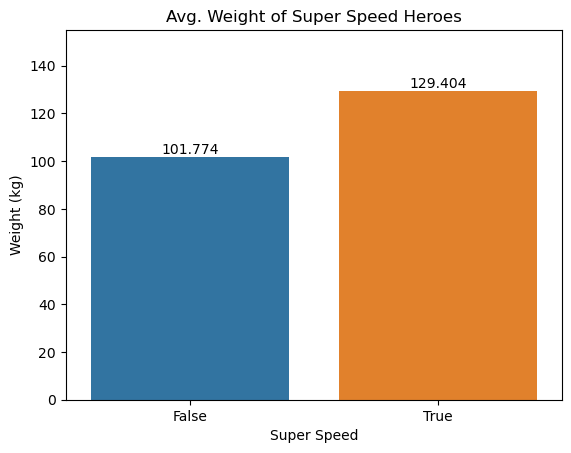

In [22]:
#Barplot
ax = sns.barplot(data = df_merged, x = 'Super Speed', y = 'Weight (kg)', errwidth=0)
ax.set_title('Avg. Weight of Super Speed Heroes')
for i in ax.containers:
    ax.bar_label(i,);

### 2. What is the average height of heroes for each publisher?

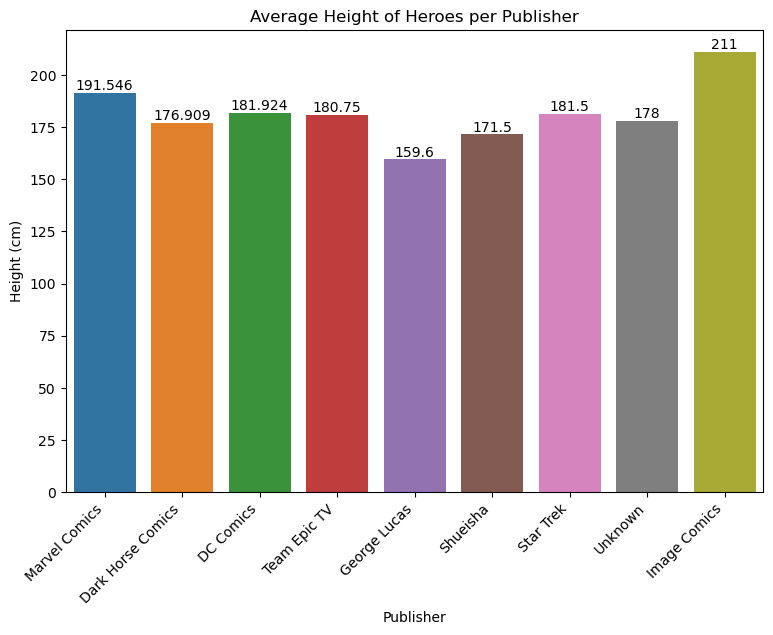

In [24]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(9, 6))

#barplot
ax = sns.barplot(data=df_merged, x='Publisher', y='Height (cm)', errwidth=0)

# Set the title
ax.set_title('Average Height of Heroes per Publisher')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
for i in ax.containers:
    ax.bar_label(i,);